In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
elevi = pd.read_csv('../data/2023/elevi.csv')
scoli = pd.read_excel("../data/general/scoli.xlsx")

In [3]:
elevi.head()

,id,school_id,genre,specialization,profile,class_type,school_type,location_type,class,mark_a,mark_b,mark_c,mark_d,pass,final_mark
0,10005,3261101959,M,Automation Technician,Technical,Technological,Daytime,URBAN,12,5.35,NaN,5.80,4.45,0,0.00
1,12037,3661100016,M,Social Sciences,Humanities,Theoretical,Reduced Frequency,URBAN,13,7.40,NaN,6.05,5.15,1,6.20
2,12284,1161104376,M,Tourism Technician,Services,Technological,Daytime,URBAN,12,5.50,NaN,8.50,5.05,1,6.35
3,12865,961100082,F,Filologie,Humanities,Theoretical,Daytime,URBAN,12,5.20,NaN,5.15,6.10,0,5.48
4,12923,2461103282,F,Organizator banqueting,Services,Technological,Daytime,RURAL,13,5.00,NaN,5.80,8.00,1,6.26


In [4]:
scoli.head()

,Cod,Județ2,Statut,Tip unitate,Formă de proprietate
0,261205195,"ARAD County, Romania",Cu personalitate juridică,Unitate de învățământ,Privată
1,261205453,"ARAD County, Romania",Cu personalitate juridică,Unitate de învățământ,Privată
2,361204107,"ARGEŞ County, Romania",Cu personalitate juridică,Unitate de învățământ,Privată
3,261205236,"ARAD County, Romania",Cu personalitate juridică,Unitate de învățământ,Privată
4,461208824,"BACĂU County, Romania",Cu personalitate juridică,Unitate de învățământ,Privată


In [8]:
elevi.head()

,id,school_id,gender,specialization,profile,class_type,school_type,location_type,class,mark_a,mark_b,mark_c,mark_d,pass,final_mark
0,10005,3261101959,M,Automation Technician,Technical,Technological,Daytime,URBAN,12,5.35,NaN,5.80,4.45,0,0.00
1,12037,3661100016,M,Social Sciences,Humanities,Theoretical,Reduced Frequency,URBAN,13,7.40,NaN,6.05,5.15,1,6.20
2,12284,1161104376,M,Tourism Technician,Services,Technological,Daytime,URBAN,12,5.50,NaN,8.50,5.05,1,6.35
3,12865,961100082,F,Filologie,Humanities,Theoretical,Daytime,URBAN,12,5.20,NaN,5.15,6.10,0,5.48
4,12923,2461103282,F,Organizator banqueting,Services,Technological,Daytime,RURAL,13,5.00,NaN,5.80,8.00,1,6.26


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

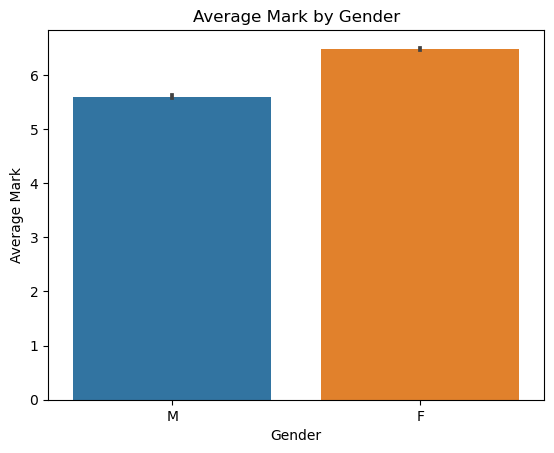

In [12]:
# create a seaborn barplot using the final_mark as data, by gender, from 'elevi' dataframe

sns.barplot(x='gender', y='final_mark', data=elevi, estimator=lambda x: sum(x) / len(x), errorbar=None)

plt.xlabel('Gender')
plt.ylabel('Average Mark')
plt.title('Average Mark by Gender')
plt.show()

In [18]:
elevi['specialization'] = elevi['specialization'].str.lower()

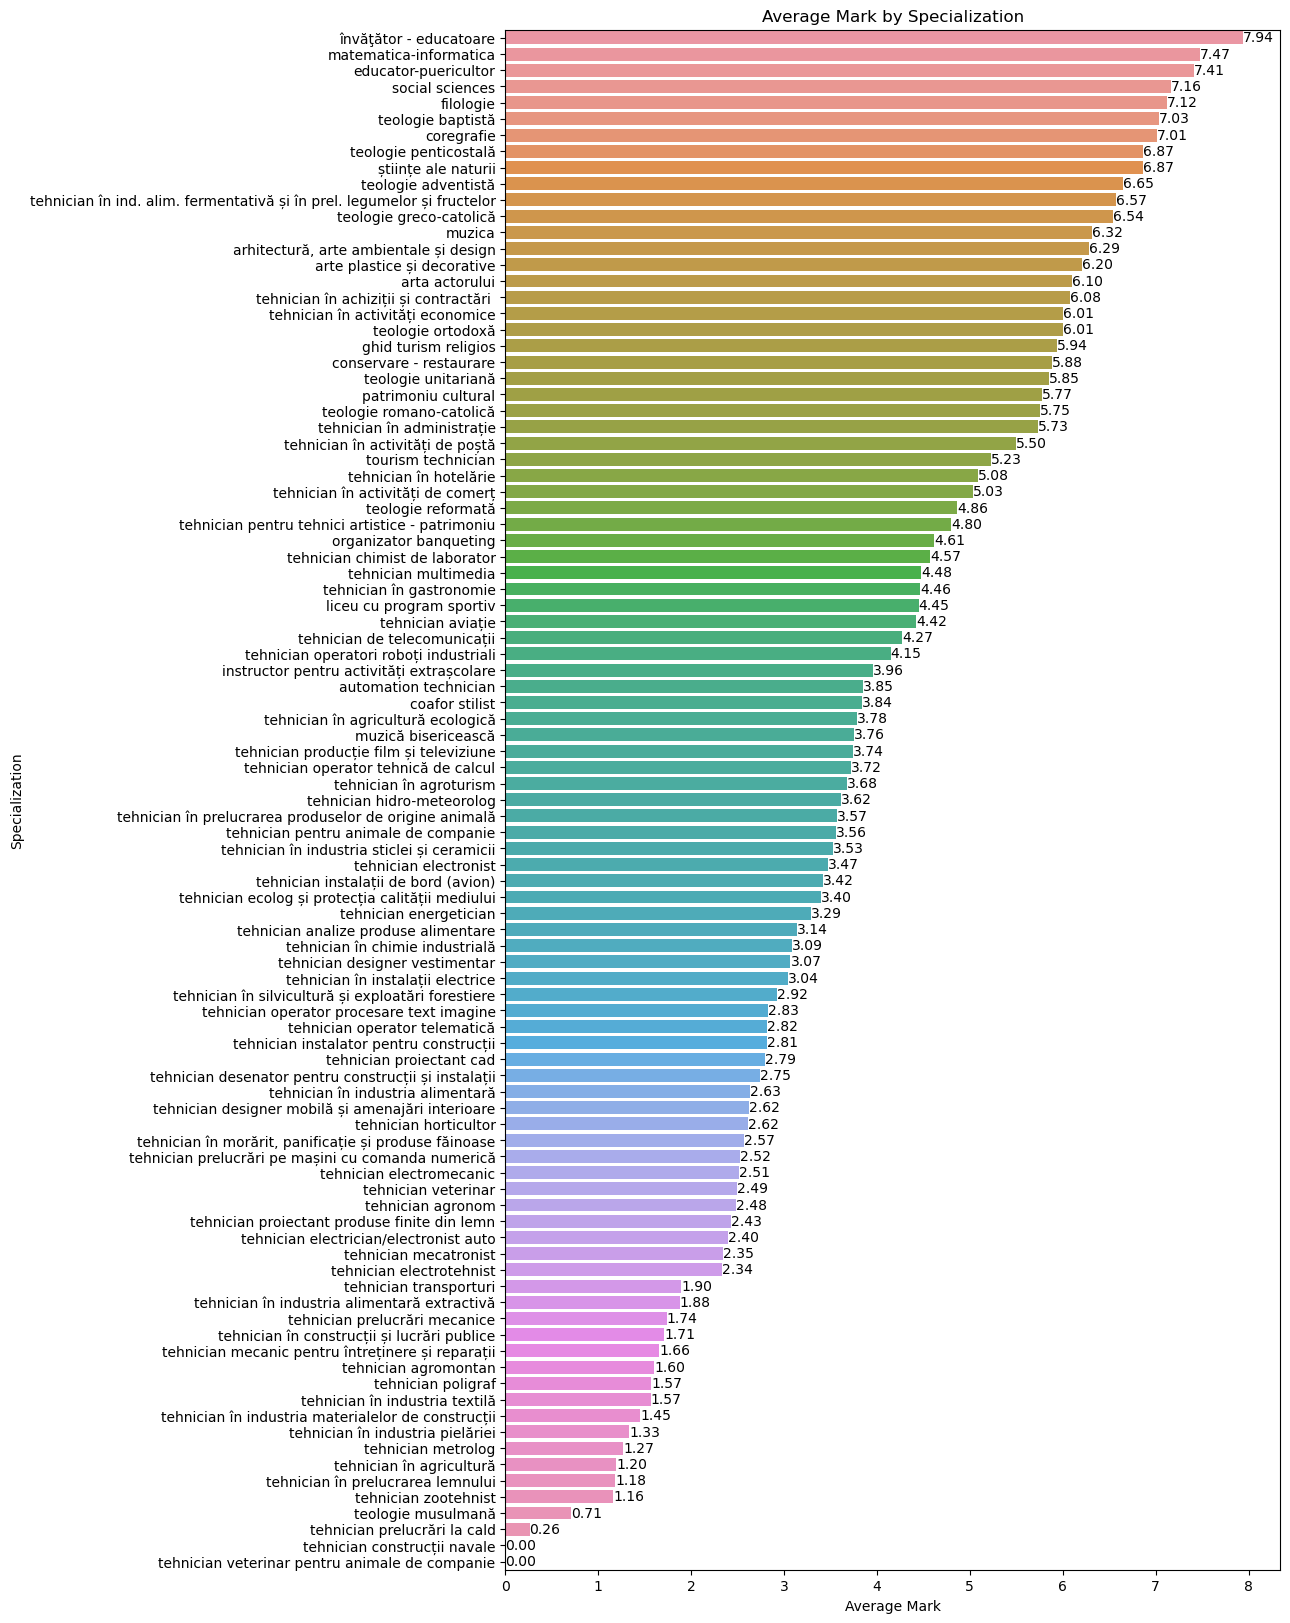

In [32]:
# create a seaborn barplot using the final_mark as data, by gender, from 'elevi' dataframe
plt.figure(figsize=(10, 20))

ax = sns.barplot(x='final_mark', y='specialization', data=elevi, estimator=lambda x: sum(x) / len(x), errorbar=None, order=elevi.groupby('specialization')['final_mark'].mean().sort_values(ascending=False).index)

plt.xlabel('Average Mark')
plt.ylabel('Specialization')
plt.title('Average Mark by Specialization')

for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_width(), p.get_y() + p.get_height() / 2.), va='center')


plt.xticks(rotation=0)  # Rotate x-axis labels by 90 degrees

plt.show()

In [33]:
top_5_gender = elevi.groupby('specialization')['final_mark'].mean().sort_values(ascending=False).tail(5).index

In [40]:
elevi['class_type'].unique()

array(['Technological', 'Theoretical', 'Vocational'], dtype=object)

In [36]:
elevi[elevi['specialization'] == "teologie musulmană"]

,id,school_id,genre,specialization,profile,class_type,school_type,location_type,class,mark_a,mark_b,mark_c,mark_d,pass,final_mark
7376,1159010,1361105103,F,teologie musulmană,Teologic,Vocational,Daytime,RURAL,12,3.90,8.2,5.40,5.10,0,0.00
89824,1406060,1361105103,M,teologie musulmană,Teologic,Vocational,Daytime,URBAN,12,2.75,1.6,3.00,2.20,0,0.00
91399,1406028,1361105103,M,teologie musulmană,Teologic,Vocational,Daytime,RURAL,12,2.00,3.1,5.00,5.15,0,0.00
91407,1406106,1361105103,F,teologie musulmană,Teologic,Vocational,Daytime,URBAN,12,2.00,1.6,3.90,4.10,0,0.00
91416,1406143,1361105103,M,teologie musulmană,Teologic,Vocational,Daytime,RURAL,12,2.50,-2.0,2.25,3.75,0,0.00
91423,1406183,1361105103,F,teologie musulmană,Teologic,Vocational,Daytime,RURAL,12,5.00,9.5,5.20,8.60,1,7.07
92638,1406435,1361105103,F,teologie musulmană,Teologic,Vocational,Daytime,URBAN,12,3.10,5.5,3.45,3.20,0,0.00
92800,1406772,1361105103,F,teologie musulmană,Teologic,Vocational,Daytime,URBAN,12,2.55,8.3,2.95,3.45,0,0.00
96106,1406738,1361105103,M,teologie musulmană,Teologic,Vocational,Daytime,RURAL,12,2.00,2.6,1.65,2.50,0,0.00
96116,1406798,1361105103,F,teologie musulmană,Teologic,Vocational,Daytime,URBAN,12,3.75,8.2,3.60,8.90,0,0.00


In [37]:
elevi['mean_mark'] = elevi[['mark_a', 'mark_b', 'mark_c', 'mark_d']].mean(axis=1)

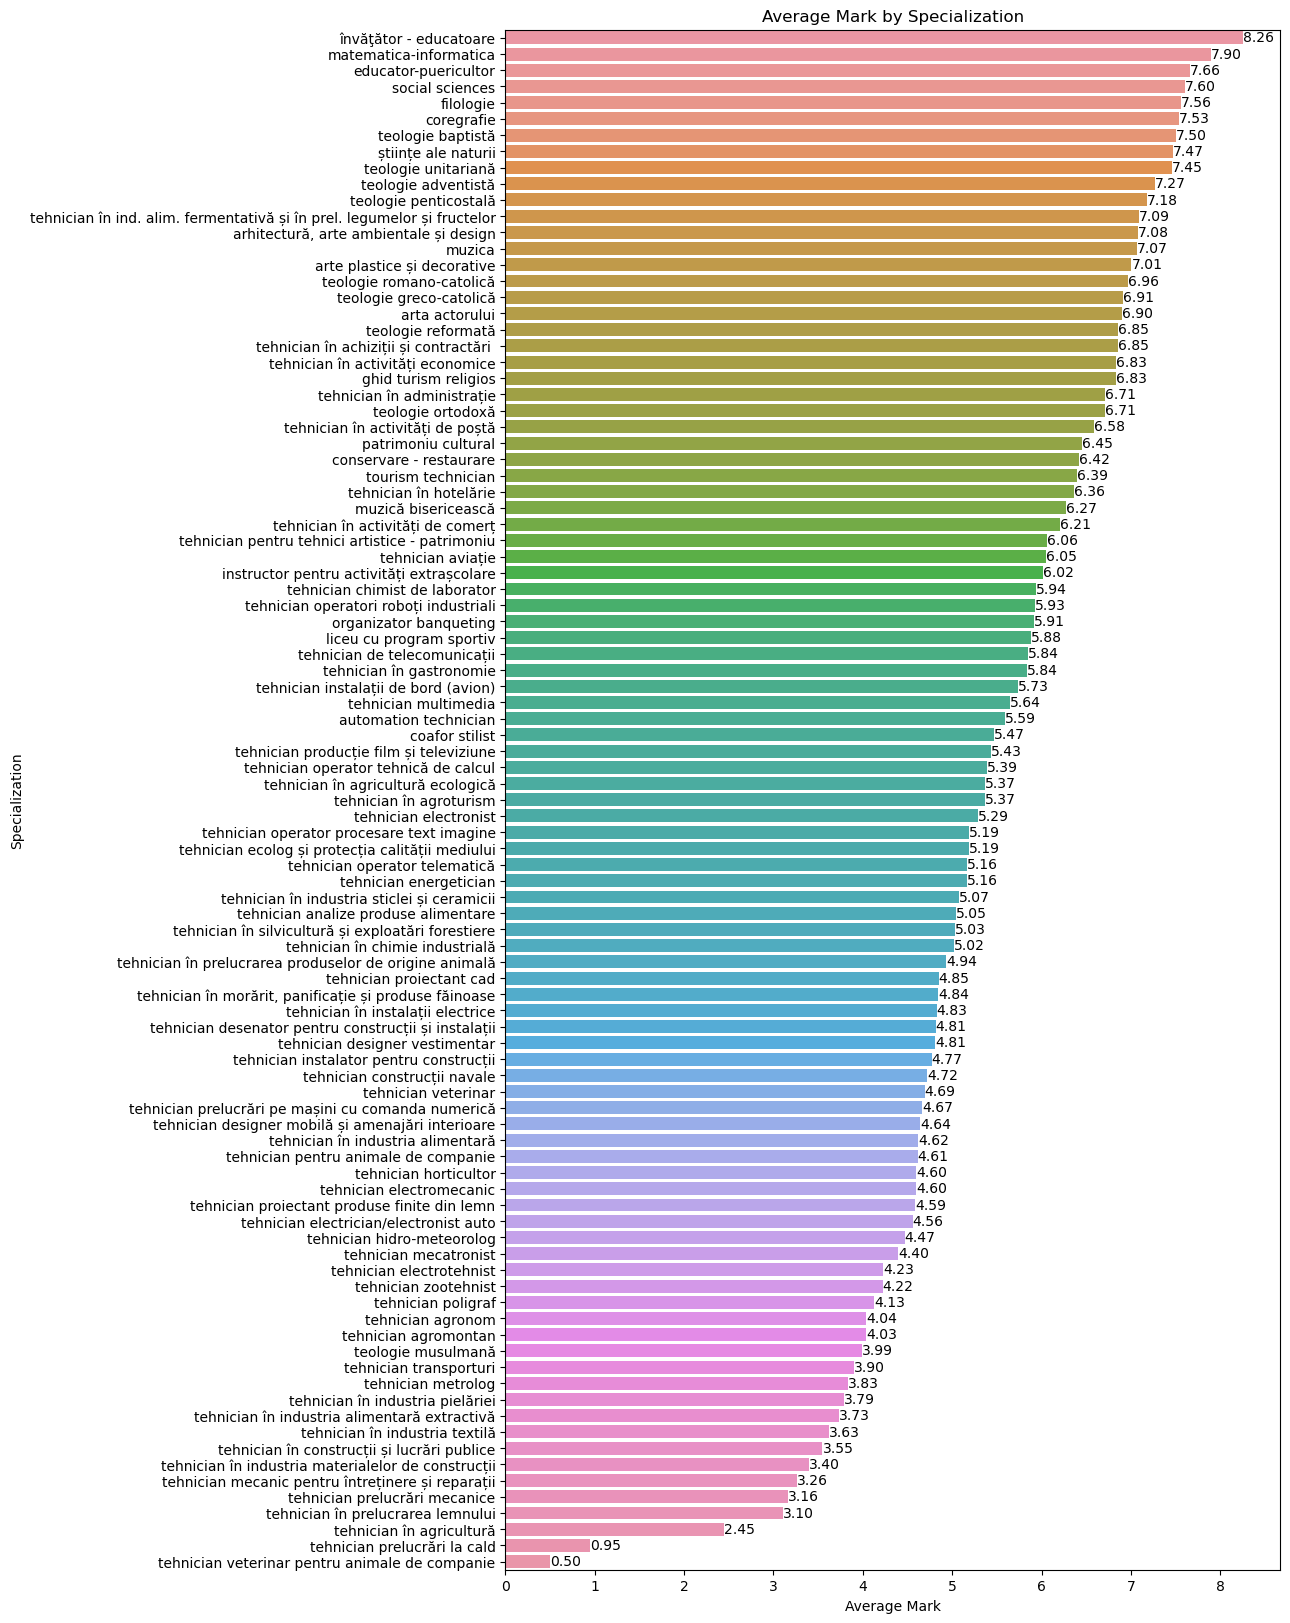

In [38]:
# create a seaborn barplot using the final_mark as data, by gender, from 'elevi' dataframe
plt.figure(figsize=(10, 20))

ax = sns.barplot(x='mean_mark', y='specialization', data=elevi, estimator=lambda x: sum(x) / len(x), errorbar=None, order=elevi.groupby('specialization')['mean_mark'].mean().sort_values(ascending=False).index)

plt.xlabel('Average Mark')
plt.ylabel('Specialization')
plt.title('Average Mark by Specialization')

for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_width(), p.get_y() + p.get_height() / 2.), va='center')


plt.xticks(rotation=0)  # Rotate x-axis labels by 90 degrees

plt.show()

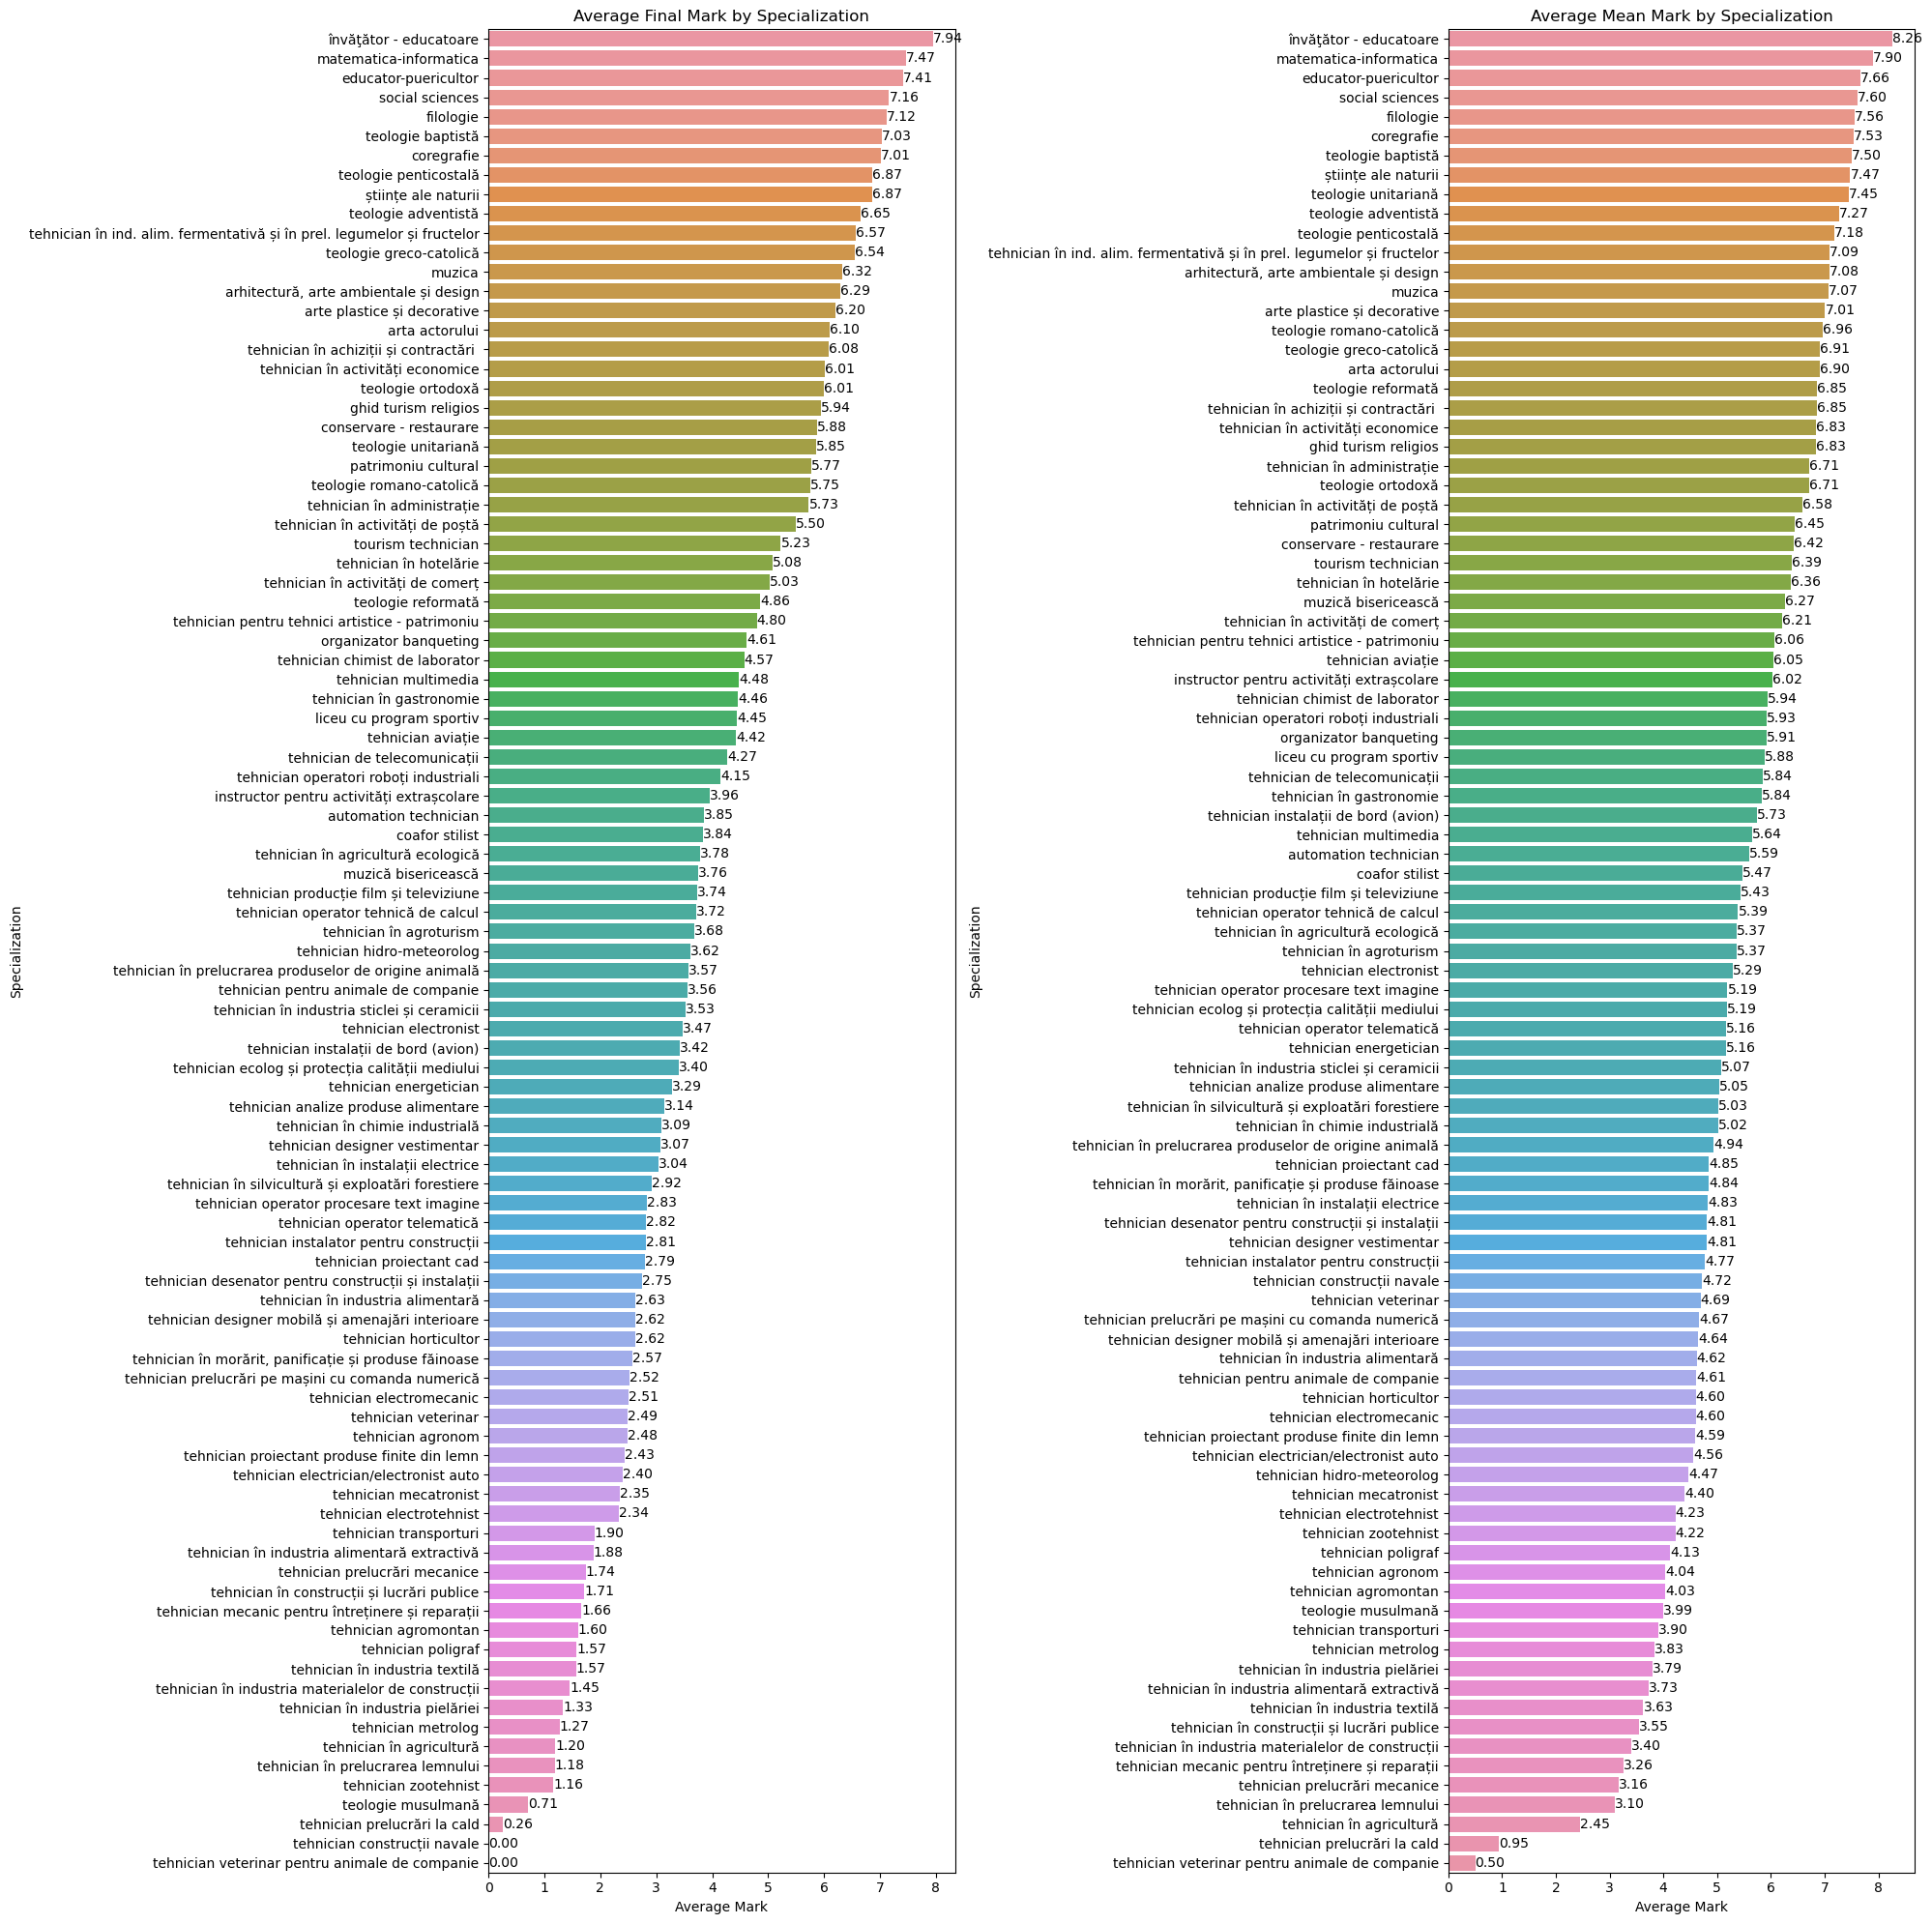

In [39]:
# Create a 1-row, 2-column figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# First plot
ax1 = sns.barplot(x='final_mark', y='specialization', data=elevi, estimator=lambda x: sum(x) / len(x), 
                  errorbar=None, order=elevi.groupby('specialization')['final_mark'].mean().sort_values(ascending=False).index, 
                  ax=axes[0])

ax1.set_xlabel('Average Mark')
ax1.set_ylabel('Specialization')
ax1.set_title('Average Final Mark by Specialization')

for p in ax1.patches:
    ax1.annotate(f"{p.get_width():.2f}", (p.get_width(), p.get_y() + p.get_height() / 2.), va='center')

# Second plot
ax2 = sns.barplot(x='mean_mark', y='specialization', data=elevi, estimator=lambda x: sum(x) / len(x), 
                  errorbar=None, order=elevi.groupby('specialization')['mean_mark'].mean().sort_values(ascending=False).index, 
                  ax=axes[1])

ax2.set_xlabel('Average Mark')
ax2.set_ylabel('Specialization')
ax2.set_title('Average Mean Mark by Specialization')

for p in ax2.patches:
    ax2.annotate(f"{p.get_width():.2f}", (p.get_width(), p.get_y() + p.get_height() / 2.), va='center')

plt.tight_layout()
plt.show()


In [54]:
plt.figure(figsize=(12, 24))  # Increase the figure size for better visibility

ax = sns.barplot(x='pass', y='specialization', data=elevi, 
                 estimator=lambda x: sum(x) / len(x), 
                 errorbar=None, 
                 order=elevi.groupby('specialization')['pass'].mean().sort_values(ascending=False).index)

# Annotate bars
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", 
                (p.get_width() + 0.1,  # Add some padding for better visibility
                 p.get_y() + p.get_height() / 2.), 
                va='center')

# Aesthetic enhancements
ax.set_xlabel('Average Mark', fontsize=16)
ax.set_ylabel('Specialization', fontsize=16)
ax.set_title('Nota medie la bacalaureat a fiecarei specializari', fontsize=18)
ax.grid(True, linestyle='--', alpha=0.7)  # Add a light grid

plt.show()


NameError: name 'mean' is not defined

<Figure size 1200x2400 with 0 Axes>

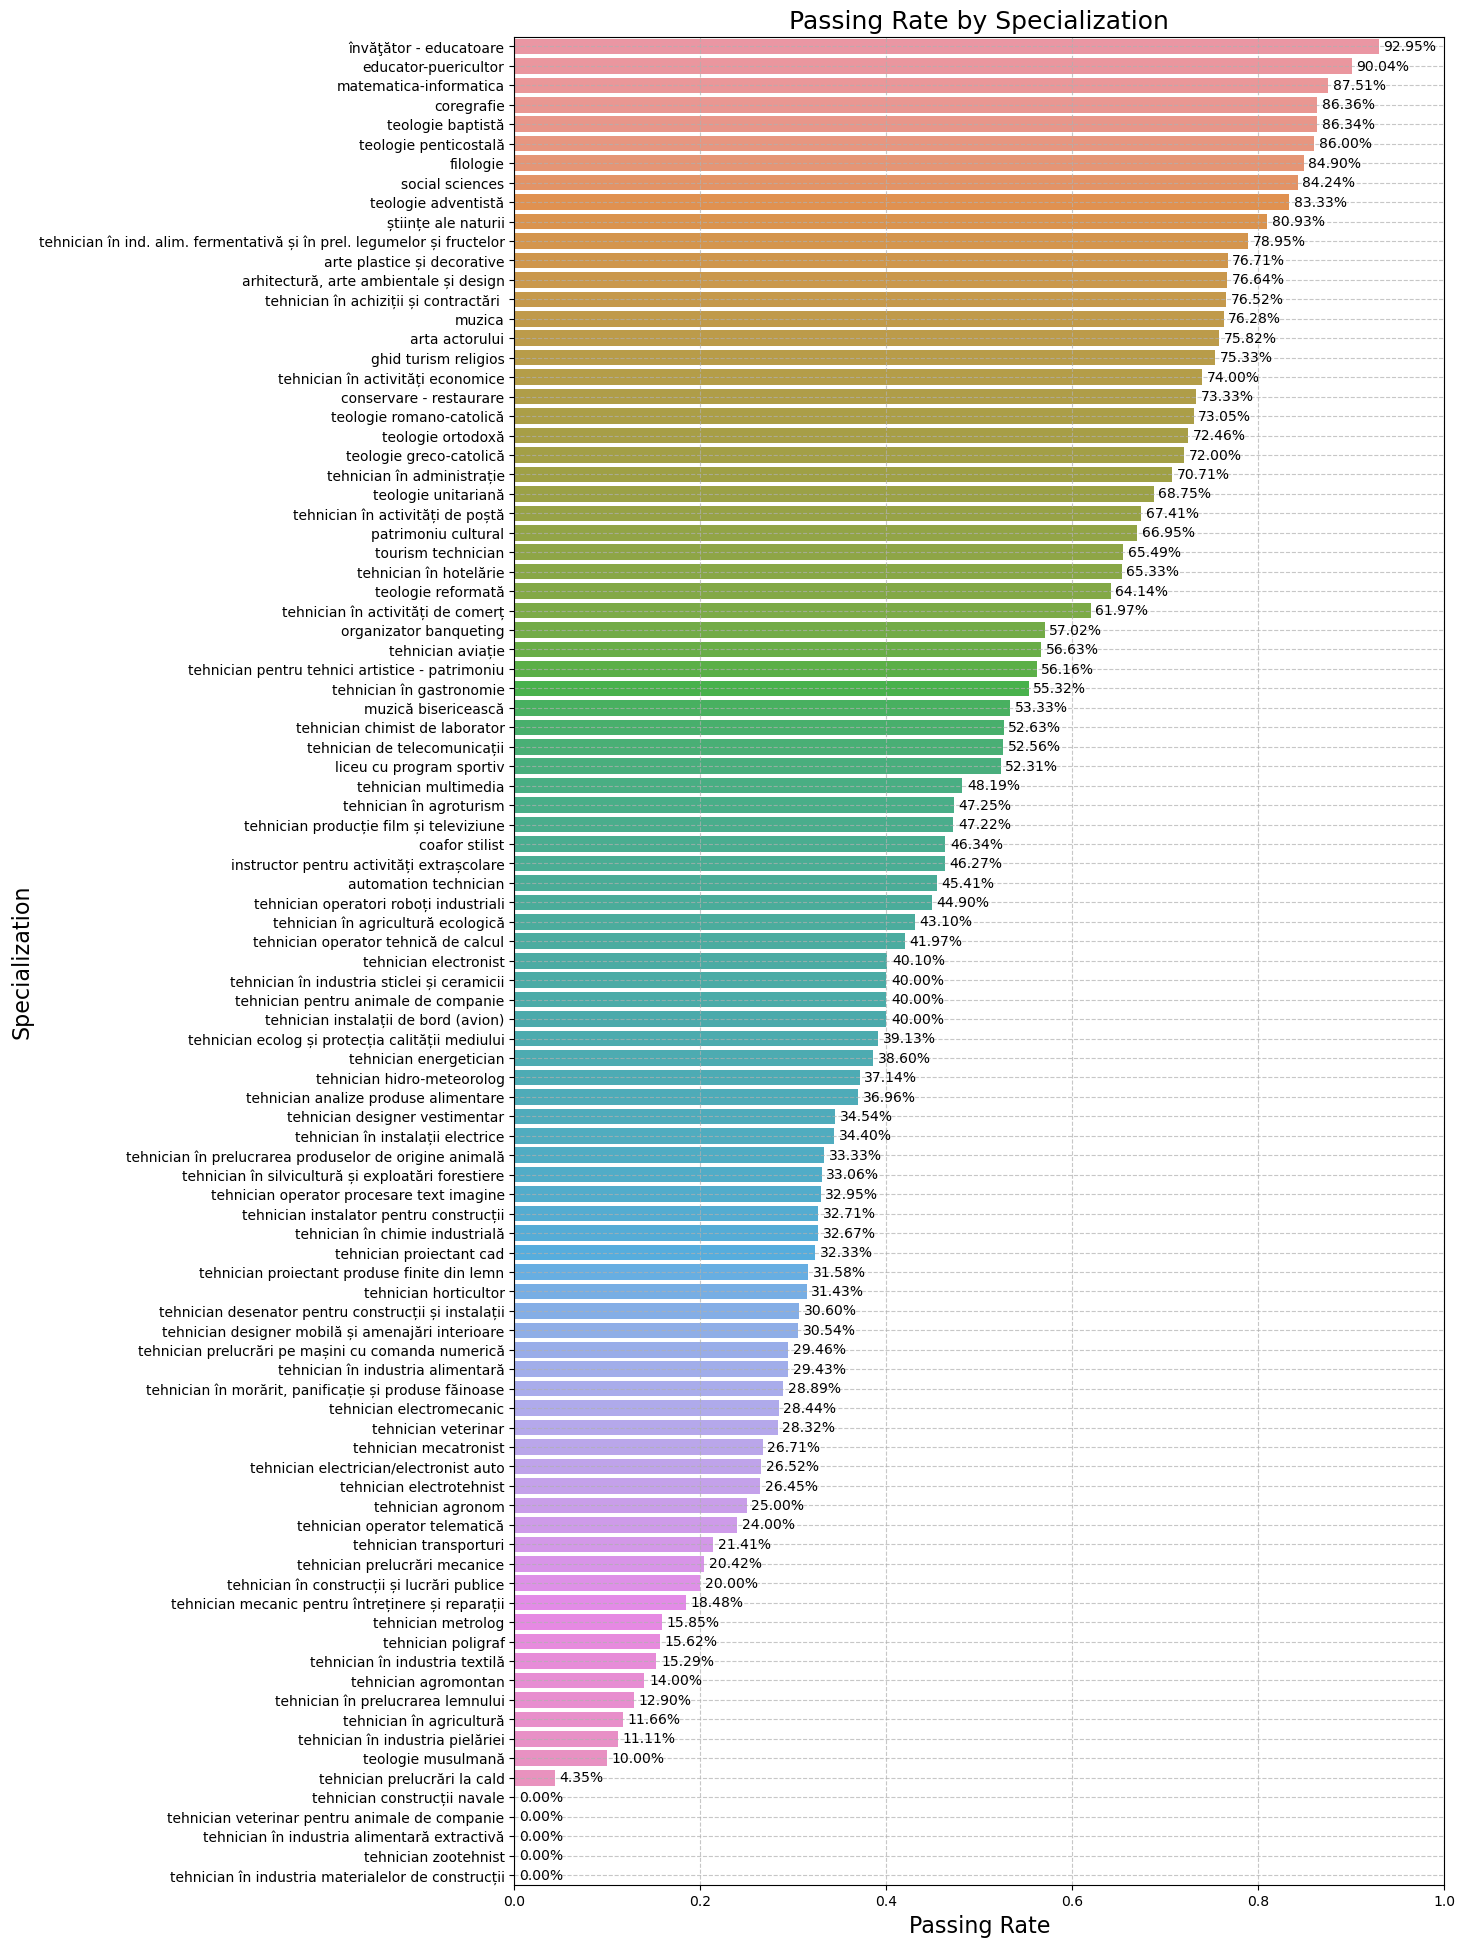

In [61]:
plt.figure(figsize=(12, 24))

# Calculate the passing rate per specialization and sort them in descending order
ordered_specializations = elevi.groupby('specialization')['pass'].mean().sort_values(ascending=False).index

ax = sns.barplot(x='pass', y='specialization', data=elevi,
                 estimator=np.mean,
                 errorbar=None,  # No confidence intervals
                 order=ordered_specializations)  # Use the ordered list of specializations

ax.set_xlim([0, 1])  # Extend to 1.1, original limit was 1.0

# Annotate bars with the passing rate
for p in ax.patches:
    ax.annotate(f"{p.get_width() * 100:.2f}%",  # Convert the passing rate to percentage
                (p.get_width() + 0.005,  # Add some padding
                 p.get_y() + p.get_height() / 2.),
                va='center')

# Aesthetic elements
ax.set_xlabel('Passing Rate', fontsize=16)
ax.set_ylabel('Specialization', fontsize=16)
ax.set_title('Passing Rate by Specialization', fontsize=18)
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()
